<a href="https://colab.research.google.com/github/fboldt/postre/blob/main/aula9b_dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [3]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [5]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [6]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [7]:
dbscan.components_.shape, dbscan.core_sample_indices_.shape

((808, 2), (808,))

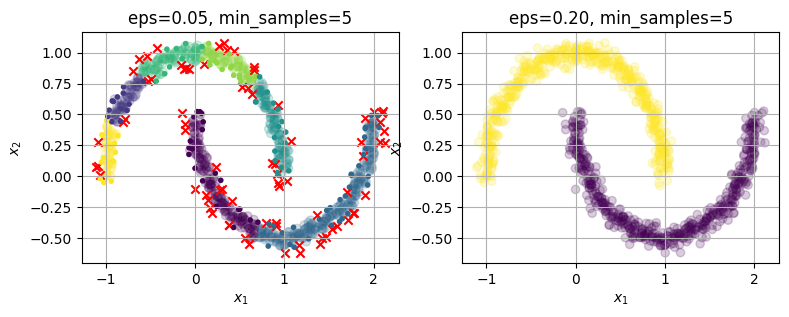

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def plot_dbscan(dbscan, X, show_xlabels=True, show_ylabels=True):
  core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
  core_mask[dbscan.core_sample_indices_] = True
  anomalies_mask = dbscan.labels_ == -1
  non_core_mask = ~(core_mask | anomalies_mask)

  cores = dbscan.components_
  anomalies = X[anomalies_mask]
  non_cores = X[non_core_mask]

  plt.scatter(cores[:, 0], cores[:, 1],
              c=dbscan.labels_[core_mask], marker='o', alpha=0.2)
  plt.scatter(anomalies[:, 0], anomalies[:, 1],
              c="r", marker='x')
  plt.scatter(non_cores[:, 0], non_cores[:, 1],
              c=dbscan.labels_[non_core_mask], marker='.')
  if show_xlabels:
    plt.xlabel("$x_1$")
  else:
    plt.tick_params(labelbottom=False)
  if show_xlabels:
    plt.ylabel("$x_2$")
  else:
    plt.tick_params(labelbottom=False)
  plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
  plt.grid()

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3))

plt.subplot(121)
plot_dbscan(dbscan, X)

plt.subplot(122)
plot_dbscan(dbscan2, X, show_ylabels=False)

plt.show()

In [15]:
dbscan = dbscan2

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [17]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [18]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

In [19]:
def plot_data(X):
  plt.plot(X[:,0], X[:,1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
  if weights is not None:
    centroids = centroids[weights > weights.max() / 10]
  plt.scatter(centroids[:, 0], centroids[:, 1],
              marker='o', s=35, linewidths=8,
              color=circle_color, zorder=10, alpha=0.9)
  plt.scatter(centroids[:, 0], centroids[:, 1],
              marker='x', s=2, linewidths=12,
              color=cross_color, zorder=11, alpha=1)

def plot_decision_boudaries(clusterer, X, resolution=1000, show_centroids=True,
                            show_xlabels=True, show_ylabels=True):
  mins = X.min(axis=0) - 0.1
  maxs = X.max(axis=0) + 0.1
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                       np.linspace(mins[1], maxs[1], resolution))
  Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               cmap="Pastel2")
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
              linewidths=1, colors='k')
  plot_data(X)
  if show_centroids:
    plot_centroids(clusterer.cluster_centers_)

  if show_xlabels:
    plt.xlabel("x1")
  else:
    plt.tick_params(labelbottom=False)
  if show_ylabels:
    plt.ylabel("x2")
  else:
    plt.tick_params(labelleft=False)

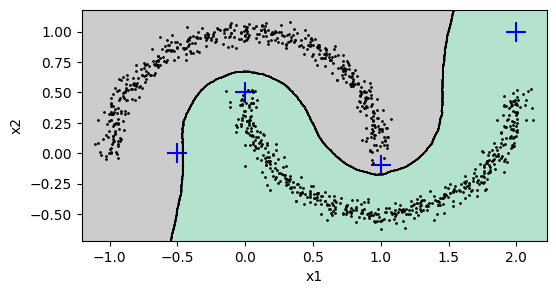

In [20]:
plt.figure(figsize=(6,3))
plot_decision_boudaries(knn, X, show_centroids=False)
plt.scatter(X_new[:,0], X_new[:,1], c="b", marker="+", s=200)
plt.show()

In [25]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred, y_dist

(array([[-1],
        [ 0],
        [ 1],
        [-1]]),
 array([[0.43045422],
        [0.02225568],
        [0.06010476],
        [0.48399468]]))

#Spectral Clustering

In [29]:
from sklearn.cluster import SpectralClustering
sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(gamma=1, n_clusters=2, random_state=42)

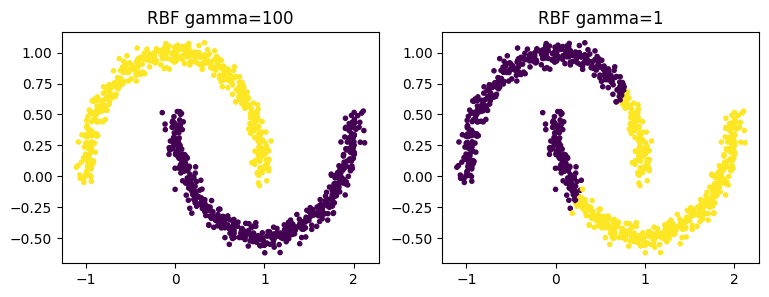

In [30]:
def plot_spectral_clustering(sc, X):
  plt.scatter(X[:,0], X[:,1], marker='.', c=sc.labels_)
  plt.title(f"RBF gamma={sc.gamma}")

plt.figure(figsize=(9,3))

plt.subplot(121)
plot_spectral_clustering(sc1, X)

plt.subplot(122)
plot_spectral_clustering(sc2, X)

plt.show()